Loading image from URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg
Library last modified: Wed Mar  5 15:06:34 2025
Loaded library: ./cuda_matlib.so
Running parallel edge detection on 1024x1024 image
Detection completed in 0.0816 seconds


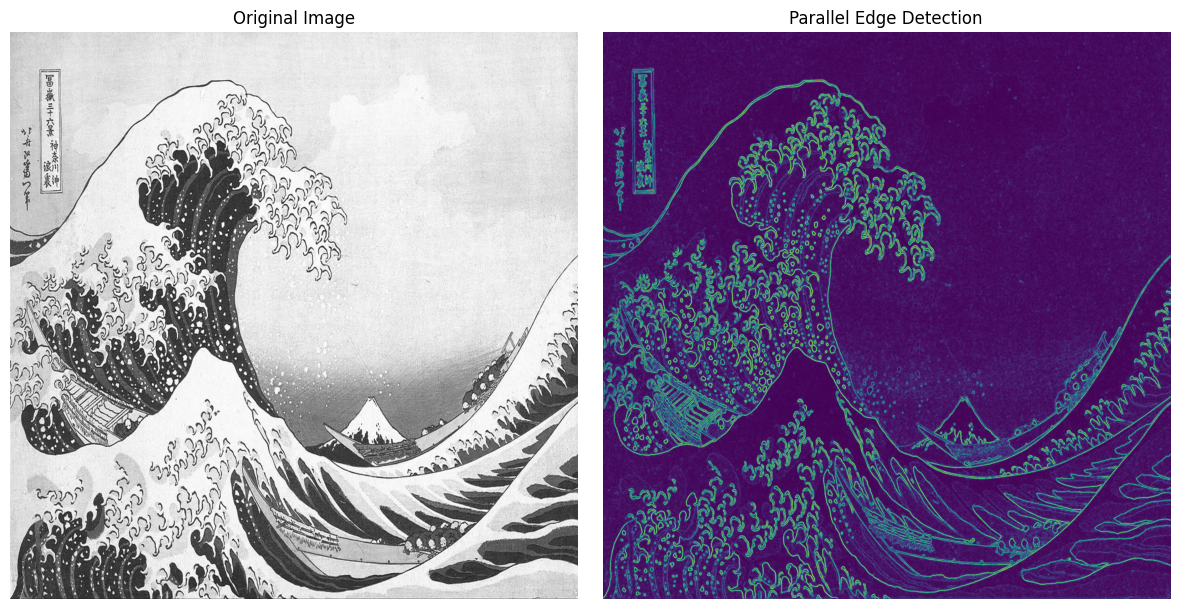

In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
import urllib.request
from io import BytesIO
from PIL import Image
import ctypes
import os
# In your Python code, before loading the library
import os, ctypes, time


def load_image(url, size=(1024, 1024)):
    """Load an image from URL, resize, and convert to grayscale."""
    print(f"Loading image from URL: {url}")
    with urllib.request.urlopen(url) as response:
        img = Image.open(BytesIO(response.read()))
    
    # Resize and convert to grayscale
    img = img.resize(size).convert('L')
    
    # Convert to numpy array and normalize
    return np.array(img, dtype=np.float64) / 255.0

class ParallelEdgeDetector:
    """Minimal class that only uses parallel edge detection."""
    
    def __init__(self, lib_path='./cuda_matlib.so'):
        # Get file modification time to verify we're using the latest version
        self.lib_mtime = os.path.getmtime(lib_path)
        print(f"Library last modified: {time.ctime(self.lib_mtime)}")
        
        # Load the library
        self.lib = ctypes.CDLL(lib_path)
        print(f"Loaded library: {lib_path}")
        
        # Set up just the parallel function
        self.lib.py_edge_detection_parallel.argtypes = [
            ctypes.c_void_p,    # Input image
            ctypes.c_void_p,    # Output result
            ctypes.c_int,       # height
            ctypes.c_int        # width
        ]
        self.lib.py_edge_detection_parallel.restype = None
    
    def detect_edges(self, image):
        """Run parallel edge detection on the image."""
        # Ensure input is double precision
        image = image.astype(np.float64)
        
        # Move to GPU
        image_d = cp.asarray(image, dtype=cp.float64)
        
        # Get dimensions
        height, width = image_d.shape
        
        # Create output array
        result_d = cp.zeros_like(image_d)
        
        print(f"Running parallel edge detection on {height}x{width} image")
        
        # Call the parallel function
        start_time = time.time()
        self.lib.py_edge_detection_parallel(
            ctypes.c_void_p(image_d.data.ptr),
            ctypes.c_void_p(result_d.data.ptr),
            ctypes.c_int(height),
            ctypes.c_int(width)
        )
        
        # Ensure computation is complete
        cp.cuda.runtime.deviceSynchronize()
        elapsed = time.time() - start_time
        print(f"Detection completed in {elapsed:.4f} seconds")
        
        # Return as numpy array
        return cp.asnumpy(result_d)

def main():
    # Use a simple test image
    test_image = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg"

    # Load image
    img = load_image(test_image, size=(1024, 1024))
    
    # Create edge detector
    detector = ParallelEdgeDetector()
    
    # Detect edges
    result = detector.detect_edges(img)
    
    # Display results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='viridis')
    plt.title("Parallel Edge Detection")
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig("parallel_edge_detection_test.png", dpi=300)
    plt.show()

if __name__ == "__main__":
    main()



Testing with image size: 512x512
Loaded library: ./cuda_matlib.so
Function signatures configured
Loading image from URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg
Running edge detection on 1200px-Tsunami_by_hokusai_19th_century.jpg
Image size: (512, 512)
Trial 1/3:
Original edge detection time: 0.0033s
Parallel edge detection time: 0.0031s
CuPy edge detection time: 0.7662s
Trial 2/3:
Original edge detection time: 0.0015s
Parallel edge detection time: 0.0039s
CuPy edge detection time: 0.0022s
Trial 3/3:
Original edge detection time: 0.0021s
Parallel edge detection time: 0.0030s
CuPy edge detection time: 0.0029s

Average Times:
Original: 0.0023s
Parallel: 0.0033s
CuPy: 0.2571s

Speedups:
Parallel vs Original: 0.69x
CuPy vs Original: 0.01x

Output Difference (Original vs Parallel):
Max difference: 0.000000
Mean difference: 0.000000


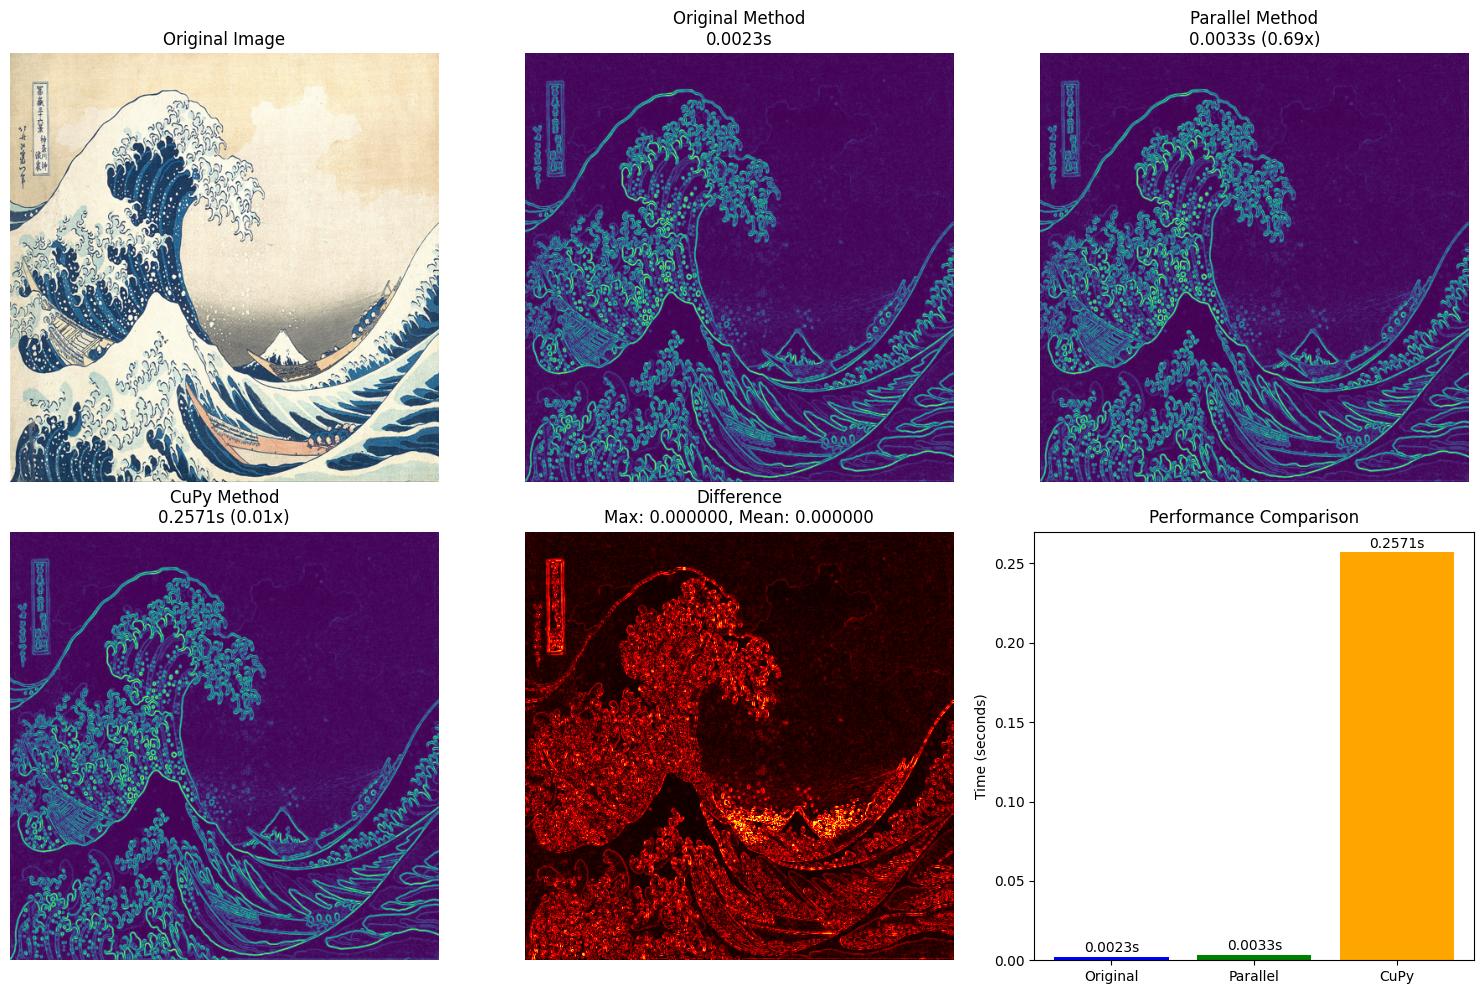



Testing with image size: 1024x1024
Loaded library: ./cuda_matlib.so
Function signatures configured
Loading image from URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg
Running edge detection on 1200px-Tsunami_by_hokusai_19th_century.jpg
Image size: (1024, 1024)
Trial 1/3:
Original edge detection time: 0.0071s
Parallel edge detection time: 0.0111s
CuPy edge detection time: 0.0043s
Trial 2/3:
Original edge detection time: 0.0045s
Parallel edge detection time: 0.0140s
CuPy edge detection time: 0.0056s
Trial 3/3:
Original edge detection time: 0.0044s
Parallel edge detection time: 0.0107s
CuPy edge detection time: 0.0043s

Average Times:
Original: 0.0054s
Parallel: 0.0120s
CuPy: 0.0047s

Speedups:
Parallel vs Original: 0.45x
CuPy vs Original: 1.14x

Output Difference (Original vs Parallel):
Max difference: 0.000316
Mean difference: 0.000000


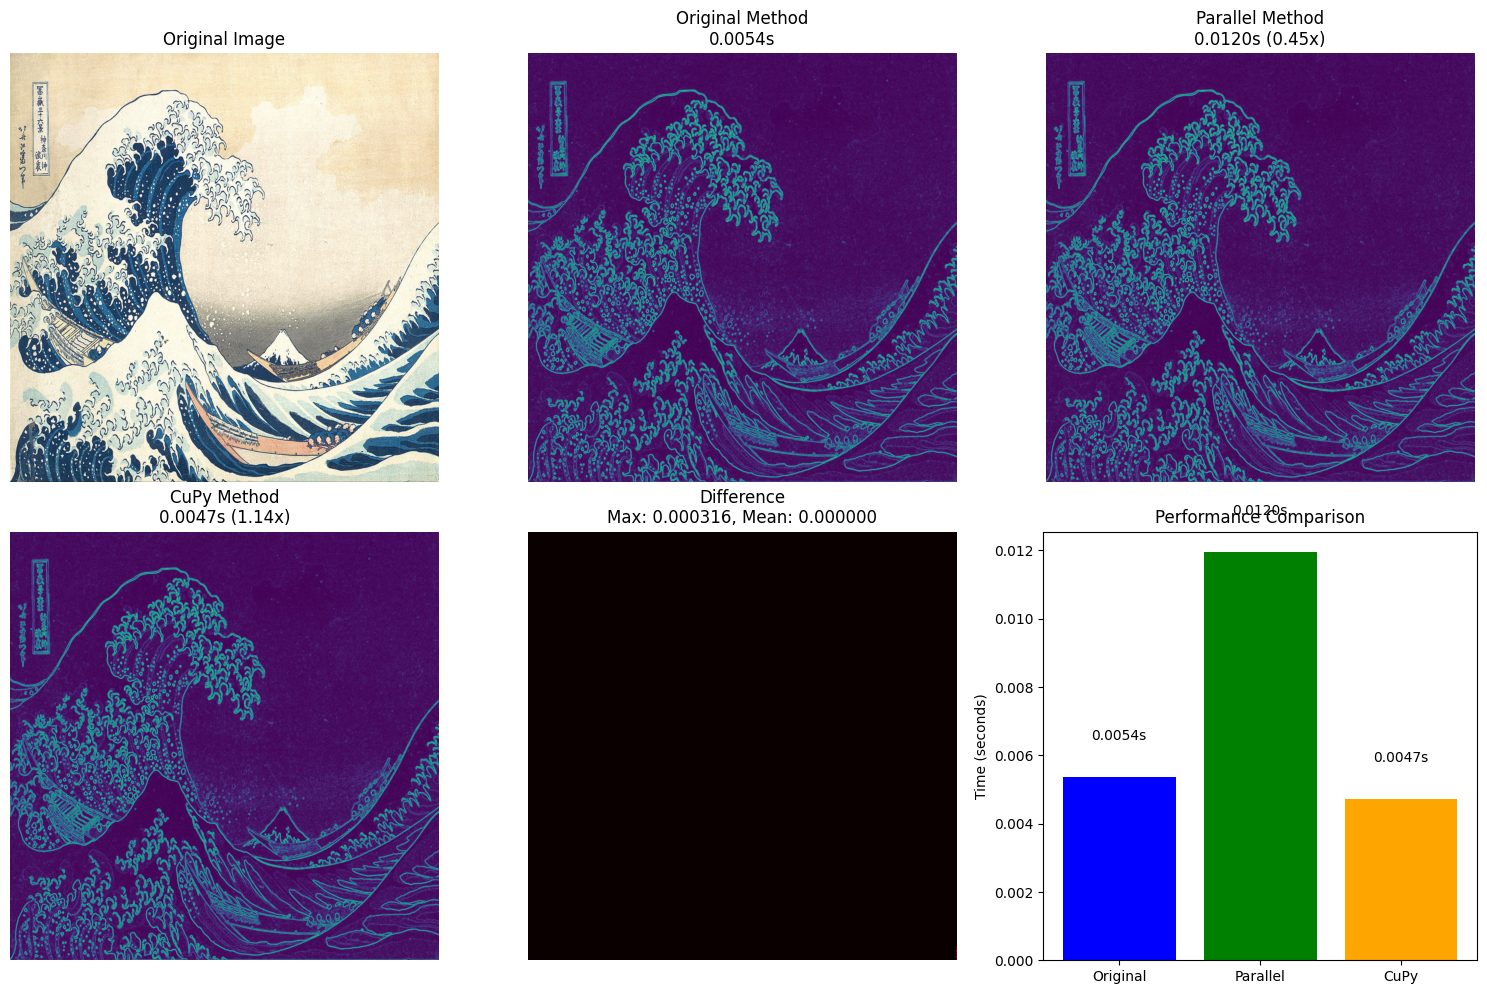



Testing with image size: 2048x2048
Loaded library: ./cuda_matlib.so
Function signatures configured
Loading image from URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg
Running edge detection on 1200px-Tsunami_by_hokusai_19th_century.jpg
Image size: (2048, 2048)
Trial 1/3:
Original edge detection time: 0.0214s
Parallel edge detection time: 0.0600s
CuPy edge detection time: 0.0153s
Trial 2/3:
Original edge detection time: 0.0181s
Parallel edge detection time: 0.0426s
CuPy edge detection time: 0.0157s
Trial 3/3:
Original edge detection time: 0.0208s
Parallel edge detection time: 0.0563s
CuPy edge detection time: 0.0167s

Average Times:
Original: 0.0201s
Parallel: 0.0530s
CuPy: 0.0159s

Speedups:
Parallel vs Original: 0.38x
CuPy vs Original: 1.27x

Output Difference (Original vs Parallel):
Max difference: 0.000420
Mean difference: 0.000000


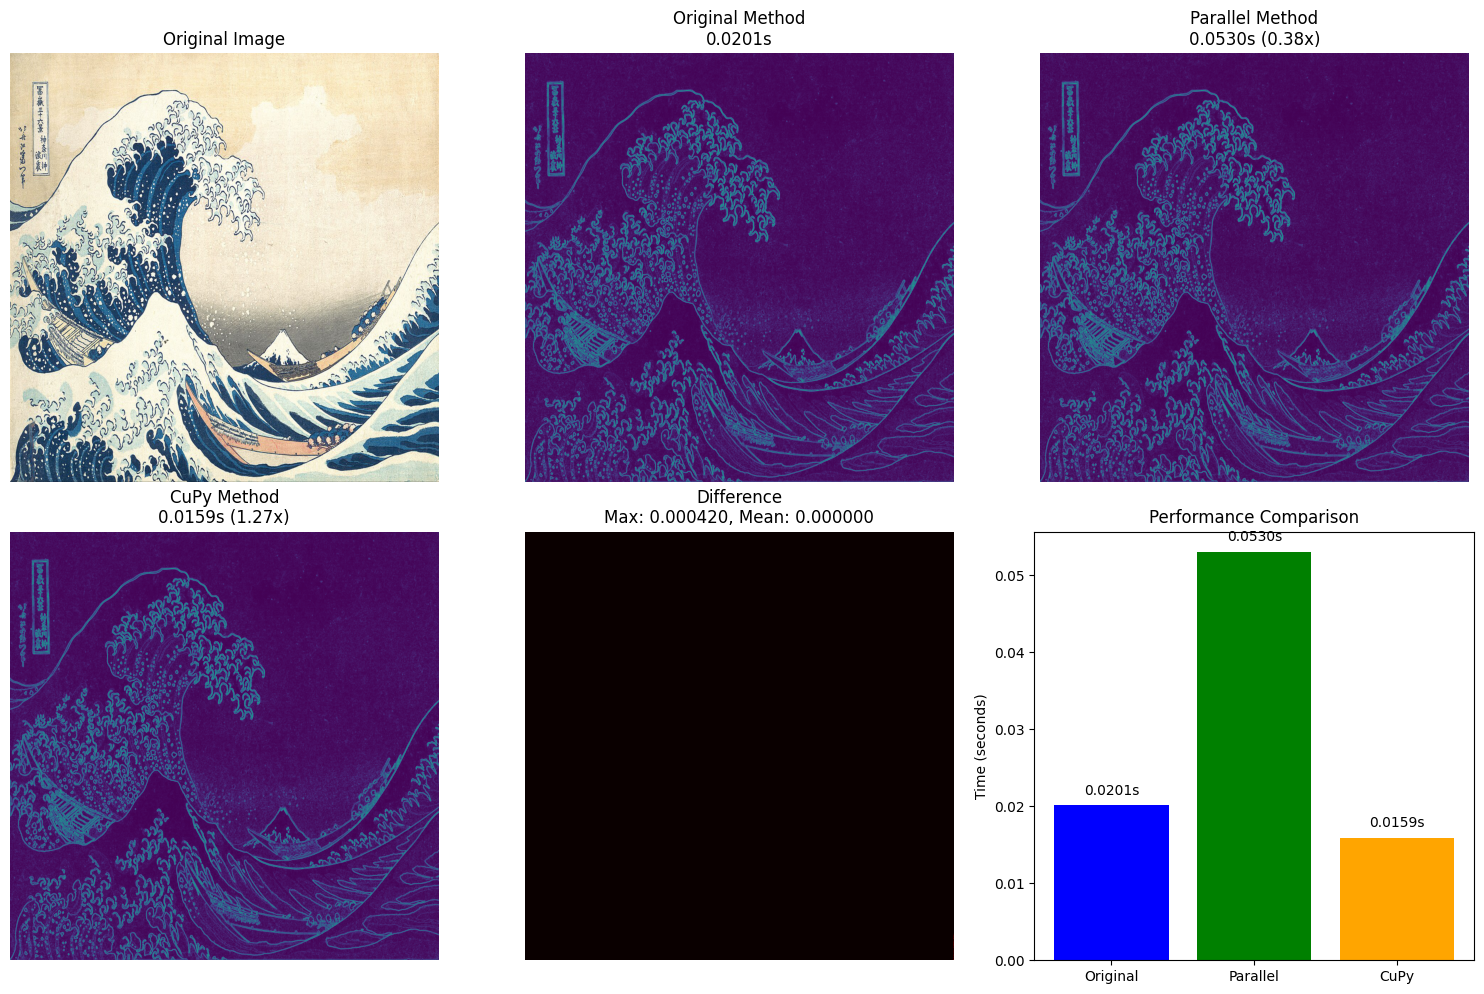

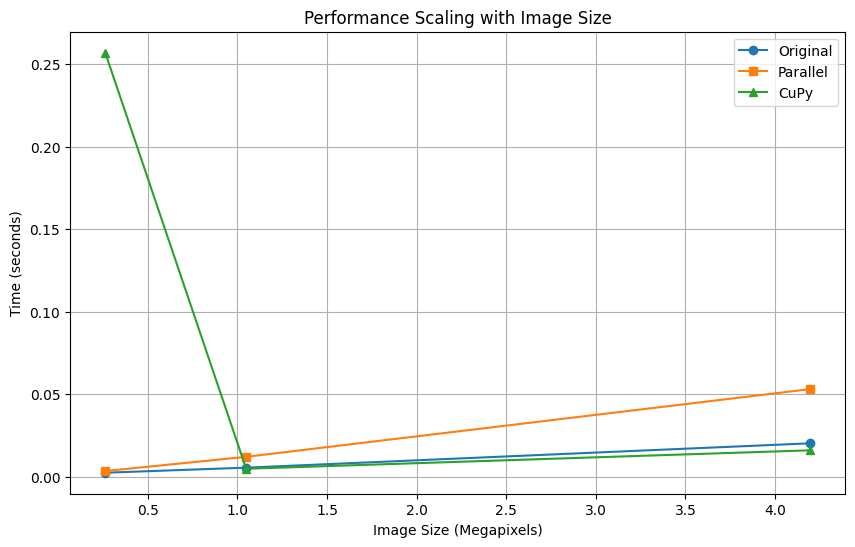

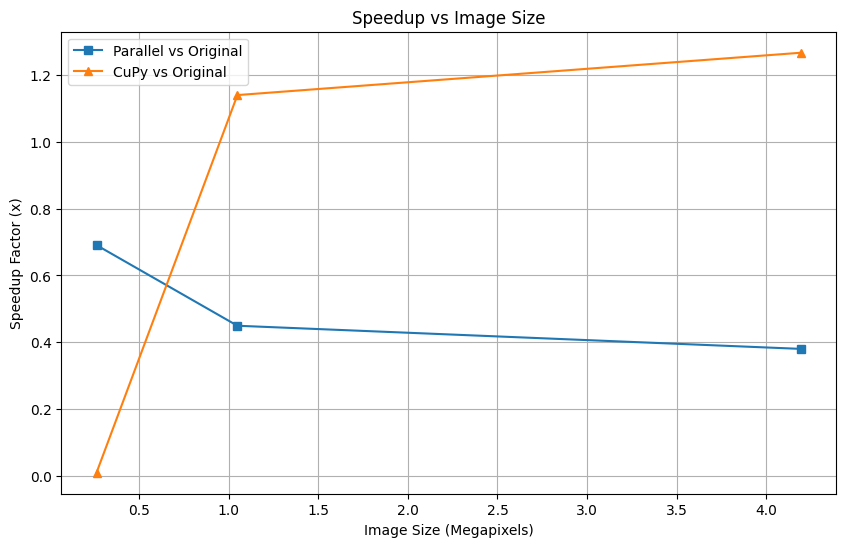

In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
import urllib.request
from io import BytesIO
from PIL import Image
import ctypes

class TensorImageOps:
    """GPU-accelerated image operations using tensor cores via CUDA Fortran."""
    
    def __init__(self, lib_path='./cuda_matlib.so'):
        try:
            # Load the library
            self.lib = ctypes.CDLL(lib_path)
            print(f"Loaded library: {lib_path}")
            
            # Set up function signatures
            self._setup_functions()
            
        except Exception as e:
            print(f"Initialization error: {e}")
            raise
    
    def _setup_functions(self):
        """Configure library function signatures."""
        # Original edge detection function
        self.lib.py_edge_detection_tensor.argtypes = [
            ctypes.c_void_p,    # Input image
            ctypes.c_void_p,    # Output result
            ctypes.c_int,       # height
            ctypes.c_int        # width
        ]
        self.lib.py_edge_detection_tensor.restype = None
        
        # Parallel edge detection function
        self.lib.py_edge_detection_parallel.argtypes = [
            ctypes.c_void_p,    # Input image
            ctypes.c_void_p,    # Output result
            ctypes.c_int,       # height
            ctypes.c_int        # width
        ]
        self.lib.py_edge_detection_parallel.restype = None
        
        print("Function signatures configured")
    
    def original_edge_detection(self, image):
        """Perform edge detection using the original method."""
        # Convert to grayscale if needed
        if image.ndim == 3:
            gray_image = np.mean(image, axis=2)
        else:
            gray_image = image
        
        gray_image = gray_image.astype(np.float64)
        
        # Ensure input is device array
        image_d = cp.asarray(gray_image, dtype=cp.float64)
        
        # Get dimensions
        height, width = image_d.shape
        
        # Create output array
        result_d = cp.zeros_like(image_d)
        
        # Call the Fortran edge detection function
        start_time = time.time()
        self.lib.py_edge_detection_tensor(
            ctypes.c_void_p(image_d.data.ptr),
            ctypes.c_void_p(result_d.data.ptr),
            ctypes.c_int(height),
            ctypes.c_int(width)
        )
        
        # Ensure operation is complete
        cp.cuda.runtime.deviceSynchronize()
        end_time = time.time()
        
        # Return result and timing
        return cp.asnumpy(result_d), end_time - start_time
    
    def parallel_edge_detection(self, image):
        """Perform edge detection using the parallel method."""
        # Convert to grayscale if needed
        if image.ndim == 3:
            gray_image = np.mean(image, axis=2)
        else:
            gray_image = image
        
        gray_image = gray_image.astype(np.float64)
        
        # Ensure input is device array
        image_d = cp.asarray(gray_image, dtype=cp.float64)
        
        # Get dimensions
        height, width = image_d.shape
        
        # Create output array
        result_d = cp.zeros_like(image_d)
        
        # Call the parallel Fortran edge detection function
        start_time = time.time()
        self.lib.py_edge_detection_parallel(
            ctypes.c_void_p(image_d.data.ptr),
            ctypes.c_void_p(result_d.data.ptr),
            ctypes.c_int(height),
            ctypes.c_int(width)
        )
        
        # Ensure operation is complete
        cp.cuda.runtime.deviceSynchronize()
        end_time = time.time()
        
        # Return result and timing
        return cp.asnumpy(result_d), end_time - start_time
    
    def edge_detection_cupy(self, image):
        """Perform edge detection using CuPy for reference."""
        # Convert to grayscale if needed
        if image.ndim == 3:
            gray_image = np.mean(image, axis=2)
        else:
            gray_image = image
            
        # Move to GPU
        image_d = cp.asarray(gray_image, dtype=cp.float64)
        
        # Create Sobel kernels
        sobel_x = cp.array([
            [-1.0, 0.0, 1.0],
            [-2.0, 0.0, 2.0],
            [-1.0, 0.0, 1.0]
        ], dtype=cp.float64)
        
        sobel_y = cp.array([
            [-1.0, -2.0, -1.0],
            [0.0, 0.0, 0.0],
            [1.0, 2.0, 1.0]
        ], dtype=cp.float64)
        
        # Perform convolution
        start_time = time.time()
        
        # Using cupyx.scipy.ndimage for convolution
        import cupyx.scipy.ndimage
        grad_x = cupyx.scipy.ndimage.correlate(image_d, sobel_x, mode='reflect')
        grad_y = cupyx.scipy.ndimage.correlate(image_d, sobel_y, mode='reflect')
        
        # Compute magnitude
        magnitude = cp.sqrt(grad_x**2 + grad_y**2)
        
        # Normalize
        if cp.max(magnitude) > 0:
            magnitude = magnitude / cp.max(magnitude)
            
        # Synchronize to ensure timing is accurate
        cp.cuda.runtime.deviceSynchronize()
        end_time = time.time()
        
        return cp.asnumpy(magnitude), end_time - start_time

def load_image(url=None, path=None, size=(1024, 1024)):
    """Load an image from URL or path, resize, and ensure color."""
    # Load image
    if url:
        print(f"Loading image from URL: {url}")
        with urllib.request.urlopen(url) as response:
            img = Image.open(BytesIO(response.read()))
    elif path:
        print(f"Loading image from path: {path}")
        img = Image.open(path)
    else:
        raise ValueError("Must provide either a URL or a path")
    
    # Resize image
    img = img.resize(size)
    
    # Convert to RGB if not already
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Convert to numpy array and normalize
    return np.array(img, dtype=np.float64) / 255.0

def compare_performance(image_url, image_size=(1024, 1024)):
    """Compare performance of different edge detection implementations."""
    tensor_ops = TensorImageOps()
    
    # Load image
    img = load_image(url=image_url, size=image_size)
    
    print(f"Running edge detection on {image_url.split('/')[-1]}")
    print(f"Image size: {img.shape[:2]}")
    
    # Run multiple trials for more reliable timing
    num_trials = 3
    original_times = []
    parallel_times = []
    cupy_times = []
    
    for i in range(num_trials):
        print(f"Trial {i+1}/{num_trials}:")
        
        # Original method
        result1, time1 = tensor_ops.original_edge_detection(img)
        original_times.append(time1)
        print(f"Original edge detection time: {time1:.4f}s")

        # Parallel method
        result2, time2 = tensor_ops.parallel_edge_detection(img)
        parallel_times.append(time2)
        print(f"Parallel edge detection time: {time2:.4f}s")

        # CuPy reference method
        result3, time3 = tensor_ops.edge_detection_cupy(img)
        cupy_times.append(time3)
        print(f"CuPy edge detection time: {time3:.4f}s")
        
        # Quick memory cleanup between trials
        cp.get_default_memory_pool().free_all_blocks()
    
    # Calculate average times
    avg_original = sum(original_times) / num_trials
    avg_parallel = sum(parallel_times) / num_trials
    avg_cupy = sum(cupy_times) / num_trials
    
    # Calculate speedups
    speedup_parallel = avg_original / avg_parallel
    speedup_cupy = avg_original / avg_cupy
    
    print("\nAverage Times:")
    print(f"Original: {avg_original:.4f}s")
    print(f"Parallel: {avg_parallel:.4f}s")
    print(f"CuPy: {avg_cupy:.4f}s")
    
    print("\nSpeedups:")
    print(f"Parallel vs Original: {speedup_parallel:.2f}x")
    print(f"CuPy vs Original: {speedup_cupy:.2f}x")
    
    # Check for any differences in output
    diff = np.abs(result1 - result2)
    max_diff = np.max(diff)
    mean_diff = np.mean(diff)
    print(f"\nOutput Difference (Original vs Parallel):")
    print(f"Max difference: {max_diff:.6f}")
    print(f"Mean difference: {mean_diff:.6f}")
    
    # Plot results
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(result1, cmap='viridis')
    plt.title(f"Original Method\n{avg_original:.4f}s")
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(result2, cmap='viridis')
    plt.title(f"Parallel Method\n{avg_parallel:.4f}s ({speedup_parallel:.2f}x)")
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(result3, cmap='viridis')
    plt.title(f"CuPy Method\n{avg_cupy:.4f}s ({speedup_cupy:.2f}x)")
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(diff, cmap='hot')
    plt.title(f"Difference\nMax: {max_diff:.6f}, Mean: {mean_diff:.6f}")
    plt.axis('off')
    
    # Bar chart of performance
    plt.subplot(2, 3, 6)
    methods = ['Original', 'Parallel', 'CuPy']
    times = [avg_original, avg_parallel, avg_cupy]
    bars = plt.bar(methods, times, color=['blue', 'green', 'orange'])
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison')
    
    # Add time labels on top of bars
    for bar, time_val in zip(bars, times):
        plt.text(bar.get_x() + bar.get_width()/2., time_val + 0.001,
                f'{time_val:.4f}s', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(f"edge_detection_performance_{image_size[0]}x{image_size[1]}.png", dpi=300)
    plt.show()
    
    return {
        "original": {"result": result1, "time": avg_original},
        "parallel": {"result": result2, "time": avg_parallel},
        "cupy": {"result": result3, "time": avg_cupy}
    }

def test_different_sizes():
    """Test performance on different image sizes."""
    test_image = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg"
    
    # Test different sizes
    sizes = [(512, 512), (1024, 1024), (2048, 2048)]
    
    results = {}
    for size in sizes:
        print(f"\n\nTesting with image size: {size[0]}x{size[1]}")
        results[size] = compare_performance(test_image, size)
    
    # Compile and plot scaling results
    original_times = [results[size]["original"]["time"] for size in sizes]
    parallel_times = [results[size]["parallel"]["time"] for size in sizes]
    cupy_times = [results[size]["cupy"]["time"] for size in sizes]
    
    # Plot scaling behavior
    plt.figure(figsize=(10, 6))
    
    # Convert sizes to megapixels for plotting
    megapixels = [(size[0] * size[1]) / 1_000_000 for size in sizes]
    
    plt.plot(megapixels, original_times, 'o-', label='Original')
    plt.plot(megapixels, parallel_times, 's-', label='Parallel')
    plt.plot(megapixels, cupy_times, '^-', label='CuPy')
    
    plt.xlabel('Image Size (Megapixels)')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Scaling with Image Size')
    plt.legend()
    plt.grid(True)
    
    plt.savefig("edge_detection_scaling.png", dpi=300)
    plt.show()
    
    # Calculate speedups at each size
    speedups_parallel = [original_times[i]/parallel_times[i] for i in range(len(sizes))]
    speedups_cupy = [original_times[i]/cupy_times[i] for i in range(len(sizes))]
    
    plt.figure(figsize=(10, 6))
    plt.plot(megapixels, speedups_parallel, 's-', label='Parallel vs Original')
    plt.plot(megapixels, speedups_cupy, '^-', label='CuPy vs Original')
    
    plt.xlabel('Image Size (Megapixels)')
    plt.ylabel('Speedup Factor (x)')
    plt.title('Speedup vs Image Size')
    plt.legend()
    plt.grid(True)
    
    plt.savefig("edge_detection_speedups.png", dpi=300)
    plt.show()
    
    return results

if __name__ == "__main__":
    # Test performance on different image sizes
    results = test_different_sizes()


=== Testing Edge Detection Methods ===

Creating test image...
Initializing TensorMatrixOps...
Initializing CUDA...
CUDA initialization complete
Loading library: ./cuda_matlib.so
Function signatures configured
Initializing CUDA resources (one-time operation)...
CUDA resources initialized

Running tensor_optimized edge detection...
Tensor optimized edge detection time: 0.008577s

Running parallel_optimized edge detection...
Parallel optimized edge detection time: 0.013860s

Parallel speedup: 0.62x
Maximum difference between results: 1.1309186698227336e-08


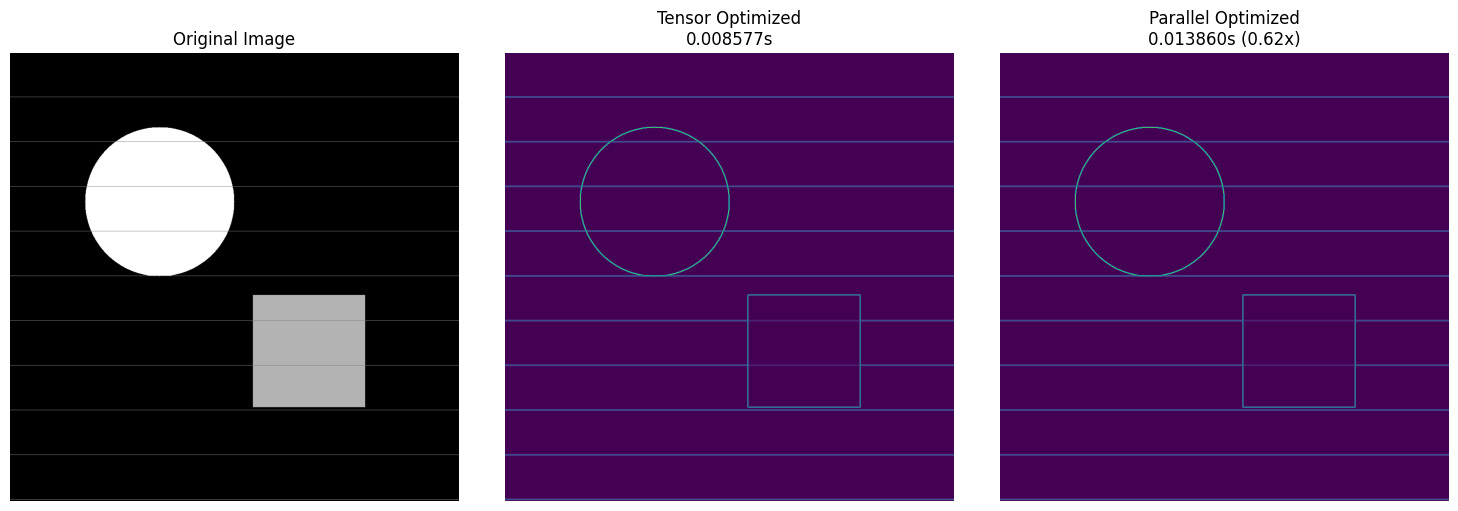

In [3]:
"""
Test script to compare the different edge detection implementations.
"""

import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from tensor_matrix_ops import TensorMatrixOps

def load_test_image(size=(512, 512)):
    """Create a test image with some geometric shapes."""
    # Create blank image
    img = np.zeros(size, dtype=np.float64)
    
    # Add a circle
    center = (size[0]//3, size[1]//3)
    radius = min(size) // 6
    y, x = np.ogrid[:size[0], :size[1]]
    dist = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    img[dist <= radius] = 1.0
    
    # Add a square
    s_x, s_y = 2*size[0]//3, 2*size[1]//3
    s_size = min(size) // 8
    img[s_y-s_size:s_y+s_size, s_x-s_size:s_x+s_size] = 0.7
    
    # Add some lines
    for i in range(0, size[0], size[0]//10):
        img[i, :] = 0.5
    
    return img

def test_edge_detection():
    print("\n=== Testing Edge Detection Methods ===\n")
    
    # Create test image
    print("Creating test image...")
    img = load_test_image((1024, 1024))
    
    # Initialize TensorMatrixOps
    print("Initializing TensorMatrixOps...")
    ops = TensorMatrixOps()
    
    # Standard edge detection
    print("\nRunning tensor_optimized edge detection...")
    start = time.time()
    result_opt = ops.edge_detection_tensor(img)
    time_opt = time.time() - start
    print(f"Tensor optimized edge detection time: {time_opt:.6f}s")
    
    # Parallel edge detection
    print("\nRunning parallel_optimized edge detection...")
    start = time.time()
    result_par = ops.edge_detection_parallel(img)
    time_par = time.time() - start
    print(f"Parallel optimized edge detection time: {time_par:.6f}s")
    
    # Calculate speedup
    speedup = time_opt / time_par
    print(f"\nParallel speedup: {speedup:.2f}x")
    
    # Compare results
    max_diff = np.max(np.abs(result_opt - result_par))
    print(f"Maximum difference between results: {max_diff}")
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(result_opt, cmap='viridis')
    plt.title(f"Tensor Optimized\n{time_opt:.6f}s")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(result_par, cmap='viridis')
    plt.title(f"Parallel Optimized\n{time_par:.6f}s ({speedup:.2f}x)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig("edge_detection_comparison.png", dpi=200)
    plt.show()
    
    return {
        'tensor_time': time_opt,
        'parallel_time': time_par,
        'speedup': speedup,
        'max_difference': max_diff
    }

if __name__ == "__main__":
    test_edge_detection()

In [4]:
        "Starry Night": "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1200px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg",
        "The Great Wave": "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/1200px-Tsunami_by_hokusai_19th_century.jpg",
        "Girl with a Pearl Earring": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/1665_Girl_with_a_Pearl_Earring.jpg/800px-1665_Girl_with_a_Pearl_Earring.jpg",
        "The Scream": "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/The_Scream.jpg/1200px-The_Scream.jpg",
        "Mona Lisa": "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

SyntaxError: illegal target for annotation (1963184269.py, line 1)